In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

1. Read CSV file

In [5]:
dataset = pd.read_csv('./data/stud.csv')
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
dataset.shape

(1000, 8)

In [8]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
dataset.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
dataset.duplicated().sum()

0

In [16]:
dataset.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Observations
* The dataset has 3 numerical and 5 categorical variables/features
* The dataset is complete without any missing values/NAs
* There are no duplicates in the dataset
* The categorical variables have range from 2 to 6 types
* The numerical variables are continuous

### Let's include additional columns for the total and average scores of the dataset

In [17]:
dataset['Total Score'] = dataset['math_score'] + dataset['reading_score'] + dataset['writing_score']

In [18]:
dataset['Average Score'] = dataset['Total Score'] / 3

In [19]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Questions to consider:
1. How many students have full marks in maths, reading and writing respectively?

In [26]:
maths_full = dataset[dataset['math_score'] == 100]['gender'].count()
reading_full = dataset[dataset['reading_score'] == 100]['gender'].count()
writing_full = dataset[dataset['writing_score'] == 100]['gender'].count()
print(f'No. of students with full marks for maths are {maths_full}, for reading are {reading_full}, and for writing are {writing_full}.')

No. of students with full marks for maths are 7, for reading are 17, and for writing are 14.


Observation: Overall, there are 17 students which got full marks for reading and 14 for writing. While only 7 students getting full marks for maths. This means that generally maths is weak area for these students. We can also see that the mean for the maths is the lowest for this group of students.

In [32]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']

print(f'Cateogrical features are {categorical_features}. \n Count: {len(categorical_features)}.')
print(f'Numerical features are {numerical_features}. \n Count: {len(numerical_features)}')

Cateogrical features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']. 
 Count: 5.
Numerical features are ['math_score', 'reading_score', 'writing_score', 'Total Score', 'Average Score']. 
 Count: 5


### Let's visualise the data to better understand the distribution/data

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Average Score', ylabel='Count'>

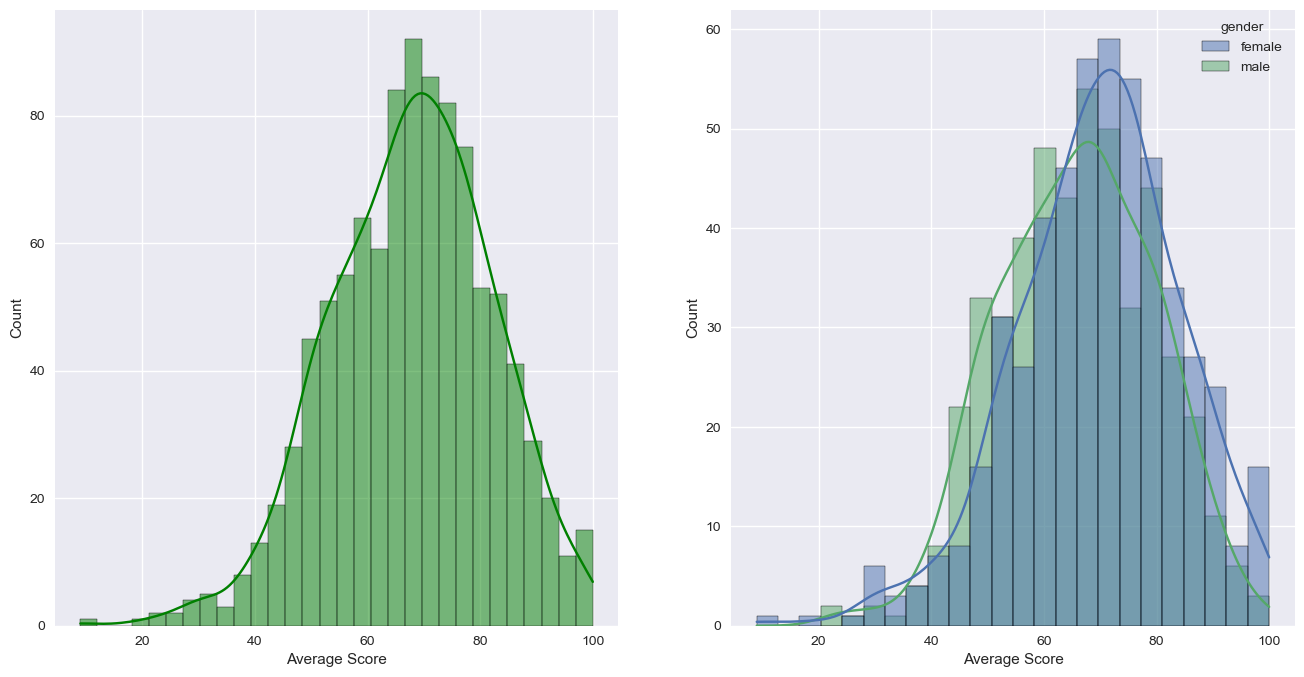

In [68]:
# I want to see how average marks are distributed for the sample and distinguish for gender types.
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
# plt.style.available
plt.style.use('seaborn-v0_8')
plt.subplot(121)
sns.histplot(data=dataset,x='Average Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='Average Score',kde=True,hue='gender')

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Score', ylabel='Count'>

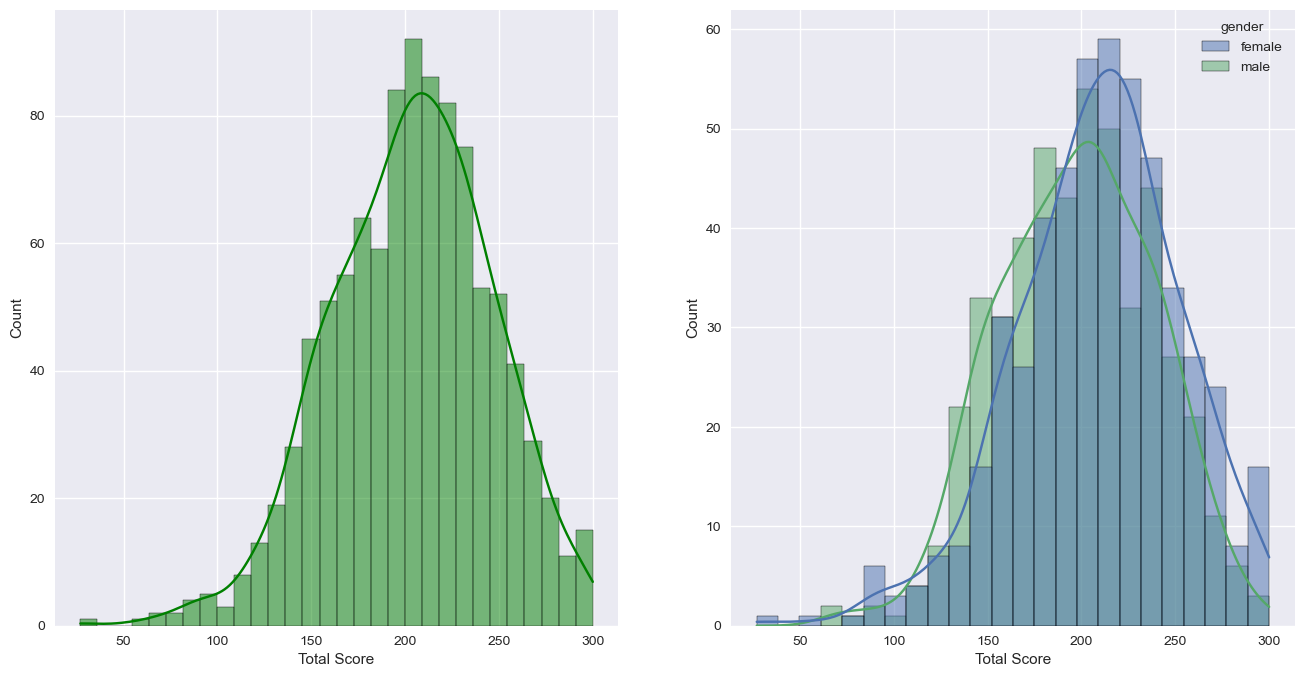

In [70]:
#For total score:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
# plt.style.available
plt.style.use('seaborn-v0_8')
plt.subplot(121)
sns.histplot(data=dataset,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='Total Score',kde=True,hue='gender')